# Lab 3: Rigid Registration


## Remainder

Among other useful information, it tells you to make a copy of this Colab notebook BEFORE you try to run it:

- Make a copy on your own Colab space by clicking on the `copy to drive` button.
- Alternatively you could go to the menu `File > Save a copy in Drive`
- Then, open your new file on a new tap and rename it, and you’re ready to start tinkering with the code
- Look carefully at the existing code before you execute it. Try to understand what the code is doing. Part of your learning outcome is to understand it, and we will quiz you about it.
- In several places of the code, you’ll find `#__________TO DO_________`.
There you should introduce your code.

Once you are done, submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.

Use `$\color{red}{\text{This is my red text}}$` to write "$\color{red}{\text{This is my red text}}$".

# Loading the required files
You can load into the temporal workspace of Colab the following required files:

*   the data files `LAB3_data`. Download them from Moodle to your computer and uncompress them.

You should copy these files from your computer using the function `files.upload()`. Use the `Choose Files` button to upload both files from your local drive.

Don't use Safari, it is preferable to use google chrome

## Goals of this lab
The aim of this lab is to develop competences regarding teamwork and problem solving. By developing the proposed activity you will also become familiar with SIFT and planar transformations for rigid image registration: how to extract invariant features, how to describe them, how to match them and how to use them to compute a homography. Most importantly, this should give you some feeling about the strengths and weaknesses of local feature-based approaches.
It should be noted that before you start this activity, you should read Lowe’s paper on SIFT:

David G. Lowe, "Distinctive image features from scale-invariant keypoints," International Journal of Computer Vision, 60, 2 (2004), pp. 91-110.
The paper can be downloaded from [here](http://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf).

This lab requires working in teams of two (exceptionally three) students. The labs will be organized on the first lab session by the professor who acts as lab instructor.

Students will have to:

1. Test Lowe’s implementation on a set of images showing some skin lesions.
2. Register the images pairs corresponding to the same skin lesion using Lowe’s implementation to detect and match features, and implementing different motion models by estimating homography matrices.
3. Improve the registration accuracy by means of data normalization for the homography estimation.

In [2]:
# Packages from GitHub.
!pip -q install git+https://github.com/adalca/neurite.git@9ae2f5cec2201eedbcc6929cecf852193cef7646
!pip -q install git+https://github.com/voxelmorph/voxelmorph.git@364394f98db7426a2d61a0fc7227746c5aa0b672


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
from google.colab import files
uploaded = files.upload()

## Additional tools
In this lab, we will also make use of:
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Routines in the aux_utils.py file, which should already be in the local directory
- Opencv
-...

In [3]:
import math, copy
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

#from aux_utils import plt_house_x, plt_contour_wgrad, plt_gradients, plt_cost_vs_theta1
# from google.colab import files
# import time
from IPython import display
from time import sleep
# import opencv
import cv2
# from google.colab.patches import cv2_imshow

import pandas as pd
import io

#Import math Library
import math
import scipy.linalg as linalg
import random

import tqdm
import neurite as ne
import voxelmorph as vxm
import tensorflow as tf

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Detect SIFT Keypoints and Descriptors
Now we will register real images.

Register skin1.png with skin2.png

First, load and show the images.

Also set SIFT to detect keypoints on images

$\color{yellow}{\text{To be done during 1st lab session}}$

In [7]:
skin_1 = cv2.imread("/content/drive/MyDrive/projects/MIRA/data/skin1.png", cv2.IMREAD_GRAYSCALE)
skin_2 = cv2.imread("/content/drive/MyDrive/projects/MIRA/data/skin2.png", cv2.IMREAD_GRAYSCALE)

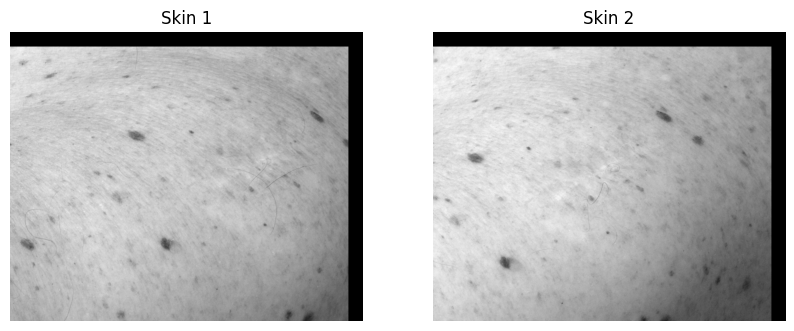

In [ ]:
# plot the images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(skin_1, cmap='gray')
plt.title('Skin 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(skin_2, cmap='gray')
plt.title('Skin 2')
plt.axis('off')

plt.show()

In [ ]:
 # Applying SIFT detector
sift = cv2.SIFT_create()
kp1 = sift.detect(skin_1, None)
kp2 = sift.detect(skin_2, None)

# keypoint descriptors
kp1, des1 = sift.compute(skin_1, kp1)
kp2, des2 = sift.compute(skin_2, kp2)

# Marking the keypoint on the image using circles
skin_1_kp=cv2.drawKeypoints(skin_1 ,
                      kp1,
                      None,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
skin_2_kp=cv2.drawKeypoints(skin_2 ,
                        kp2,
                        None,
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [ ]:
print(kp1[0].pt)

(26.505558013916016, 367.0071716308594)


## Plot the Keypoints
$\color{yellow}{\text{To be done during 1st lab session}}$

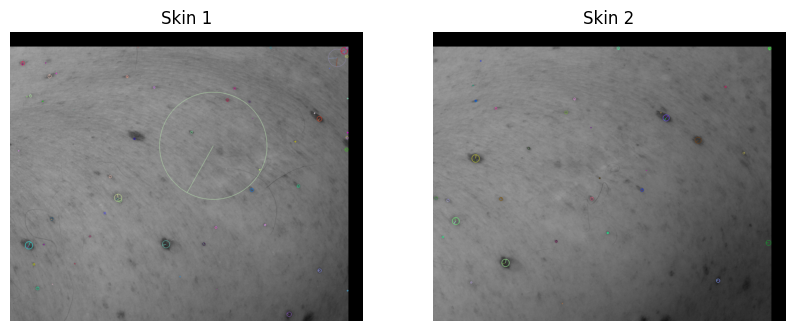

In [ ]:
# plot the images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(skin_1_kp, cmap='gray')
plt.title('Skin 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(skin_2_kp, cmap='gray')
plt.title('Skin 2')
plt.axis('off')

plt.show()

## Compute Brute Force Matching

$\color{yellow}{\text{To be done during 1st lab session}}$

In [ ]:
# Matching the descriptors
bf = cv2.BFMatcher()
matches = bf.match(des1, des2)

Plot matches

$\color{yellow}{\text{To be done during 1st lab session}}$

Number of matches: 82


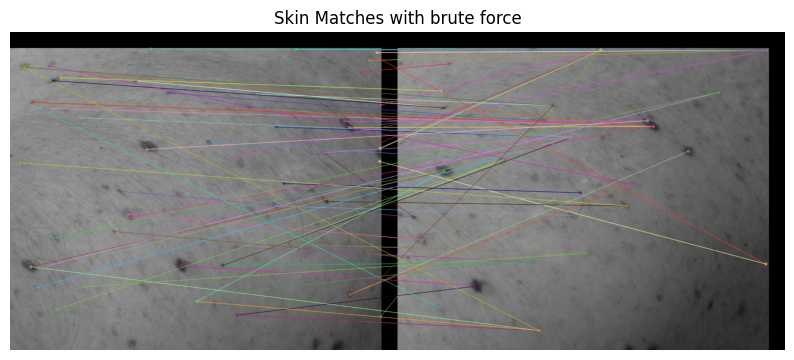

In [ ]:
# Sorting the matches based on distance
matches = sorted(matches, key = lambda x:x.distance)
# Drawing the matches
skin_matches = cv2.drawMatches(skin_1, kp1, skin_2, kp2, matches, None, flags = 2)
# print number of matches
print(f"Number of matches: {len(matches)}")
# plot the images
plt.figure(figsize=(10, 10))
plt.imshow(skin_matches)
plt.title('Skin Matches with brute force')
plt.axis('off')
plt.show()


In [ ]:
print(matches[0].queryIdx)

80


## Lowe match

Now implement by yourself a function to match keypoints and descriptors between these 2 images

Implement the function `SIFT_match` following the article "Distinctive image features from scale-invariant keypoints" David G. Lowe.

$\color{yellow}{\text{To be done during 1st lab session}}$

In [ ]:
def sift_match(des1, des2, ratio=0.75):
    """
    Match SIFT descriptors between two images using Lowe's ratio test

    Args:
        des1: Descriptors from first image
        des2: Descriptors from second image
        ratio: Ratio threshold for Lowe's test (default 0.75)

    Returns:
        good_matches: List of good matches that pass ratio test
    """
    # Use BFMatcher to find 2 nearest neighbors for each descriptor
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test as per Lowe's paper
    good_matches = []
    for m, n in matches:
        if m.distance < ratio * n.distance:
            good_matches.append(m)

    return good_matches

Recompute the matches using your function

$\color{yellow}{\text{To be done during 1st lab session}}$

In [ ]:
matches = sift_match(des1, des2)

Plot the new matches

$\color{yellow}{\text{To be done during 1st lab session}}$

Number of matches: 28


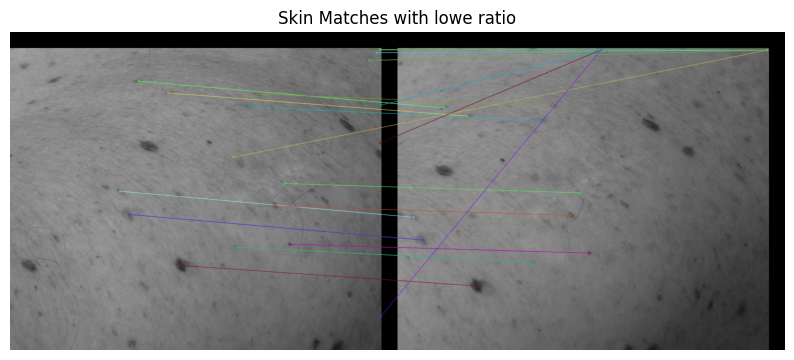

In [ ]:
# Drawing the matches
skin_matches = cv2.drawMatches(skin_1, kp1, skin_2, kp2, matches, None, flags = 2)
# print number of matches
print(f"Number of matches: {len(matches)}")
# plot the images
plt.figure(figsize=(10, 10))
plt.imshow(skin_matches)
plt.title('Skin Matches with lowe ratio')
plt.axis('off')
plt.show()

## Compute Homographies

Compute the homography between both images using opencv function `cv2.findHomography`

Plot one of the images warped acording to the obtained Homograhy

$\color{yellow}{\text{To be done during 1st lab session}}$

In [ ]:
def compute_homography(kp1, kp2, matches):
    """
    Compute homography matrix between two images

    Args:
        kp1: Keypoints from first image
        kp2: Keypoints from second image
        matches: List of good matches

    Returns:
        H: Homography matrix
    """
    # Extract keypoints from matches
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute homography
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    return H

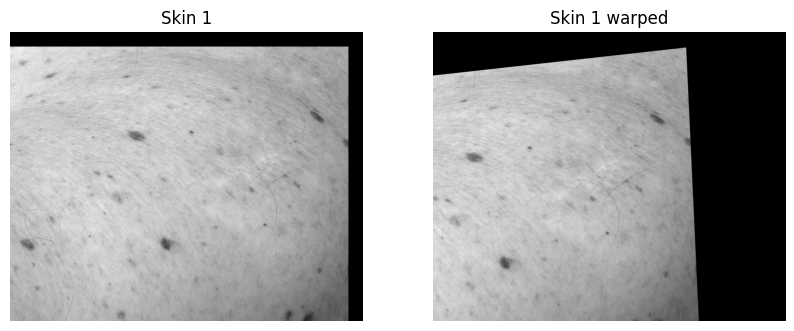

In [ ]:
# Compute homography
H = compute_homography(kp1, kp2, matches)

# Warp the images
skin_1_warped = cv2.warpPerspective(skin_1, H, (skin_1.shape[1], skin_1.shape[0]))

# plot the images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(skin_1, cmap='gray')
plt.title('Skin 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(skin_1_warped, cmap='gray')
plt.title('Skin 1 warped')
plt.axis('off')

plt.show()

## Homography estimation

$\color{yellow}{\text{To be done during 2nd lab session}}$

Next, we will load images `00.png`, `01.png`, `02.png` and `03.png`

In [ ]:
img00c = cv2.imread("/content/drive/MyDrive/projects/MIRA/data/00.png")
img01c = cv2.imread("/content/drive/MyDrive/projects/MIRA/data/01.png")
img02c = cv2.imread("/content/drive/MyDrive/projects/MIRA/data/02.png")
img03c = cv2.imread("/content/drive/MyDrive/projects/MIRA/data/03.png")

And the csv files with keypoints

In [ ]:
keypoints_00 = genfromtxt('/content/drive/MyDrive/projects/MIRA/data/Keypoints_00.csv', delimiter=',', skip_header = 0)
keypoints_01 = genfromtxt('/content/drive/MyDrive/projects/MIRA/data/Keypoints_01.csv', delimiter=',', skip_header = 0)
keypoints_02 = genfromtxt('/content/drive/MyDrive/projects/MIRA/data/Keypoints_02.csv', delimiter=',', skip_header = 0)
keypoints_03 = genfromtxt('/content/drive/MyDrive/projects/MIRA/data/Keypoints_03.csv', delimiter=',', skip_header = 0)

print(np.shape(keypoints_00))
print(keypoints_00)

(64, 2)
[[1266.3   232.7 ]
 [1266.3   320.63]
 [1266.3   407.7 ]
 [1266.3   495.64]
 [1266.3   582.7 ]
 [1266.3   670.63]
 [1266.3   757.7 ]
 [1266.3   845.63]
 [1178.4   232.7 ]
 [1178.5   320.5 ]
 [1178.5   408.  ]
 [1178.5   495.5 ]
 [1178.5   583.  ]
 [1178.5   670.5 ]
 [1178.5   758.  ]
 [1178.3   845.65]
 [1091.3   232.7 ]
 [1091.    320.5 ]
 [1091.    408.  ]
 [1091.    495.5 ]
 [1091.    583.  ]
 [1091.    670.5 ]
 [1091.    758.  ]
 [1091.3   845.63]
 [1003.4   232.7 ]
 [1003.5   320.5 ]
 [1003.5   408.  ]
 [1003.5   495.5 ]
 [1003.5   583.  ]
 [1003.5   670.5 ]
 [1003.5   758.  ]
 [1003.3   845.65]
 [ 916.3   232.7 ]
 [ 916.    320.5 ]
 [ 916.    408.  ]
 [ 916.    495.5 ]
 [ 916.    583.  ]
 [ 916.    670.5 ]
 [ 916.    758.  ]
 [ 916.3   845.64]
 [ 828.37  232.7 ]
 [ 828.5   320.5 ]
 [ 828.5   407.99]
 [ 828.5   495.5 ]
 [ 828.5   583.  ]
 [ 828.5   670.5 ]
 [ 828.5   758.  ]
 [ 828.35  845.65]
 [ 741.3   232.7 ]
 [ 741.    320.5 ]
 [ 741.    408.  ]
 [ 741.    495.5 ]
 [ 7

Now plot img00c, img01c, img02c, img03c all images using `cv2_imshow` from `opencv`

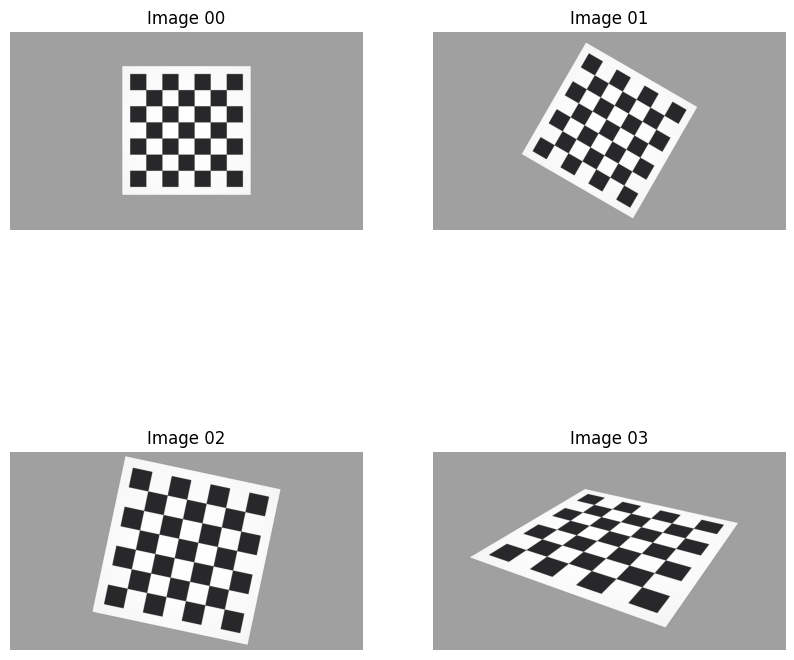

In [ ]:
# plot the images
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img00c)
plt.title('Image 00')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img01c)
plt.title('Image 01')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img02c)
plt.title('Image 02')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img03c)
plt.title('Image 03')
plt.axis('off')

plt.show()

Plot Keypoints on images.

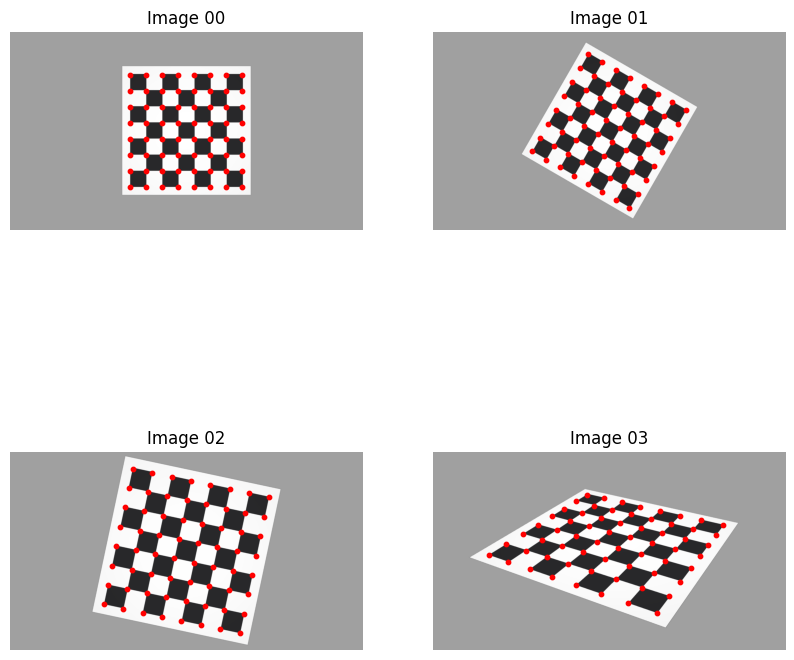

In [ ]:
# plot the keypoints on the images
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img00c)
plt.scatter(keypoints_00[:, 0], keypoints_00[:, 1], c='r', s=10)
plt.title('Image 00')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img01c)
plt.scatter(keypoints_01[:, 0], keypoints_01[:, 1], c='r', s=10)
plt.title('Image 01')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img02c)
plt.scatter(keypoints_02[:, 0], keypoints_02[:, 1], c='r', s=10)
plt.title('Image 02')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img03c)
plt.scatter(keypoints_03[:, 0], keypoints_03[:, 1], c='r', s=10)
plt.title('Image 03')
plt.axis('off')

plt.show()


## Compute Homography

Implement the function:

H = computeHomography(features, matches, model)

where model can be ('Euclidean', 'Similarity', 'Affine', 'Porjective')

follow your notes from MIRA lessons, don't use any opencv existing function

Planar transformation = homography e.g (euclidean, similarity, affine and projective)
correspondences -  point in A as relate to B
Outliers -  wrong correspondences
Ransac - remove outliers

In [ ]:
def computeHomography(features, matches, model):
    """
    Compute the homography matrix based on the specified model.

    Args:
        features: Keypoints or features from the images
        matches: Corresponding matches between the features
        model: Type of homography ('Euclidean', 'Similarity', 'Affine', 'Projective')

    Returns:
        H: Homography matrix
    """
    src_points = np.asarray(features, dtype=np.float32)
    dst_points = np.asarray(matches, dtype=np.float32)


    if model == 'Euclidean':
        # Euclidean transformation: rotation + translation (no scaling)
        centroid_src = np.mean(src_points, axis=0)
        centroid_dst = np.mean(dst_points, axis=0)

        src_centered = src_points - centroid_src
        dst_centered = dst_points - centroid_dst

        # Compute rotation using Singular Value Decomposition (SVD)
        H = np.dot(dst_centered.T, src_centered)
        U, _, Vt = np.linalg.svd(H)
        R = np.dot(U, Vt)

        # Compute translation
        t = centroid_dst - np.dot(R, centroid_src)

        # Construct the homography matrix
        H = np.eye(3)
        H[:2, :2] = R
        H[:2, 2] = t

    elif model == 'Similarity':
        # Similarity transformation: rotation, translation, uniform scaling
        centroid_src = np.mean(src_points, axis=0)
        centroid_dst = np.mean(dst_points, axis=0)

        src_centered = src_points - centroid_src
        dst_centered = dst_points - centroid_dst

        # Compute scaling and rotation using SVD
        H = np.dot(dst_centered.T, src_centered)
        U, S, Vt = np.linalg.svd(H)
        R = np.dot(U, Vt)
        scale = np.sum(S) / np.sum(src_centered ** 2)

        # Compute translation
        t = centroid_dst - scale * np.dot(R, centroid_src)

        # Construct the homography matrix
        H = np.eye(3)
        H[:2, :2] = scale * R
        H[:2, 2] = t

    elif model == 'Affine':
        # Affine transformation: linear transformation + translation
        A = []
        b = []
        for i in range(len(src_points)):
            x, y = src_points[i]
            x_prime, y_prime = dst_points[i]
            A.append([x, y, 1, 0, 0, 0])
            A.append([0, 0, 0, x, y, 1])
            b.append(x_prime)
            b.append(y_prime)

        A = np.array(A)
        b = np.array(b)

        # Solve for affine parameters
        params, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
        H = np.array([[params[0], params[1], params[2]],
                      [params[3], params[4], params[5]],
                      [0, 0, 1]])

    elif model == 'Projective':
        # Projective transformation (homography)
        A = []
        for i in range(len(src_points)):
            x, y = src_points[i]
            x_prime, y_prime = dst_points[i]
            A.append([-x, -y, -1, 0, 0, 0, x * x_prime, y * x_prime, x_prime])
            A.append([0, 0, 0, -x, -y, -1, x * y_prime, y * y_prime, y_prime])

        A = np.array(A)

        # Solve for homography parameters
        _, _, Vt = np.linalg.svd(A)
        H = Vt[-1].reshape(3, 3)

    else:
        raise ValueError("Invalid model type. Choose from 'Euclidean', 'Similarity', 'Affine', 'Projective'.")

    return H


In [ ]:
def compute_and_plot_homography(src_img, dst_img, src_keypoints, dst_keypoints, model='Euclidean'):
    """
    Compute homography between two images and plot the results.

    Args:
        src_img: Source image
        dst_img: Destination image
        src_keypoints: Keypoints from the source image
        dst_keypoints: Keypoints from the destination image
        model: Type of homography ('Euclidean', 'Similarity', 'Affine', 'Projective')
    """
    # Compute homography
    H = computeHomography(src_keypoints, dst_keypoints, model)

    # Use cv2.warpPerspective to check the obtained result
    warped_image = cv2.warpPerspective(src_img, H, (src_img.shape[1], src_img.shape[0]))

    # Plot the images
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(src_img)
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(dst_img)
    plt.title('Destination Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(warped_image)
    plt.title(f'Warped Source Image using {model} model')
    plt.axis('off')

    plt.show()


##Compute Eucliedean Homography

Compute the Euclidean Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

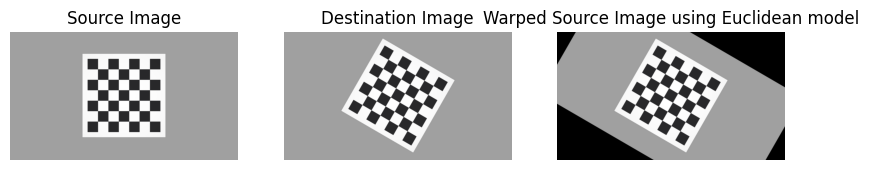

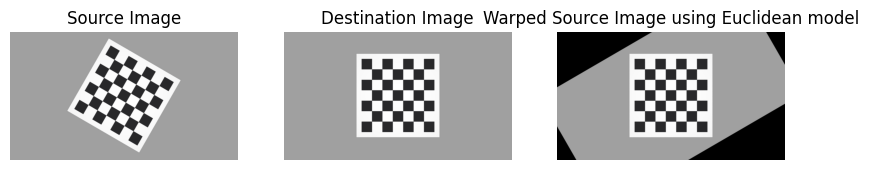

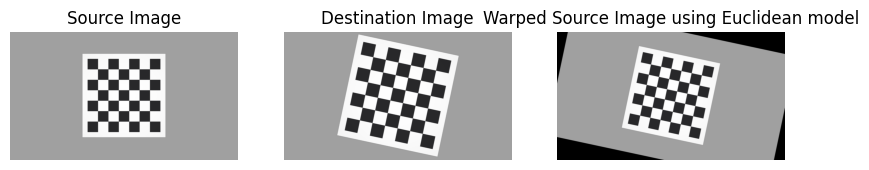

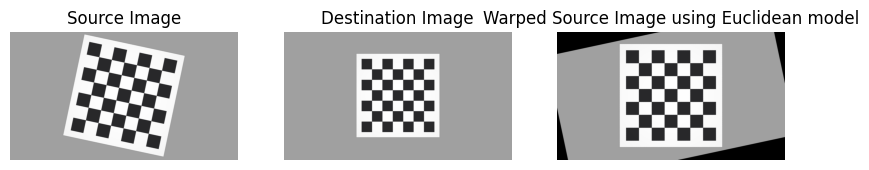

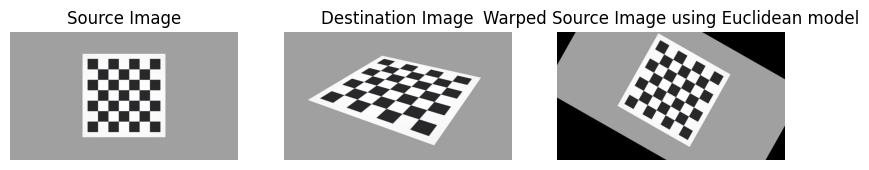

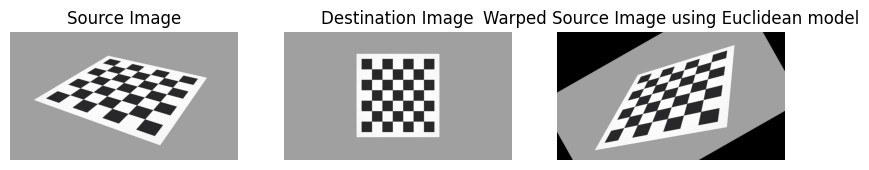

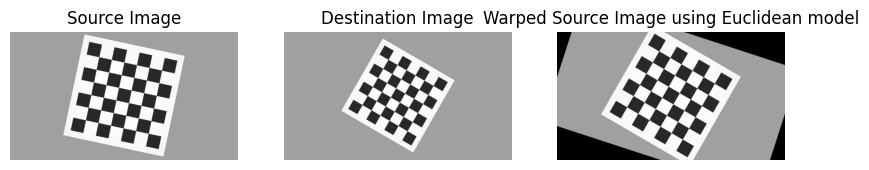

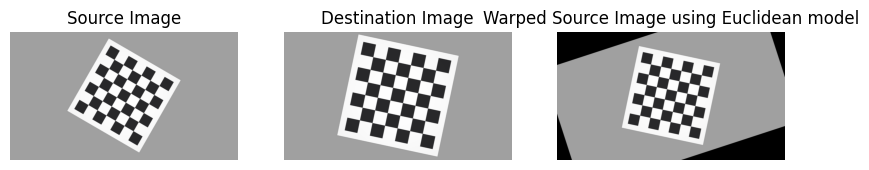

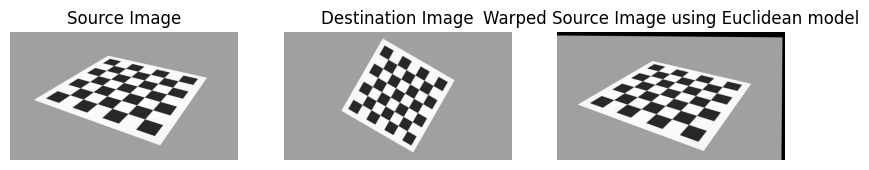

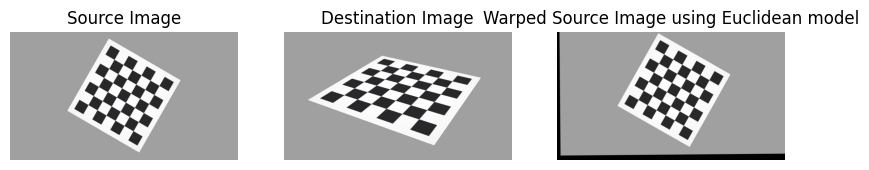

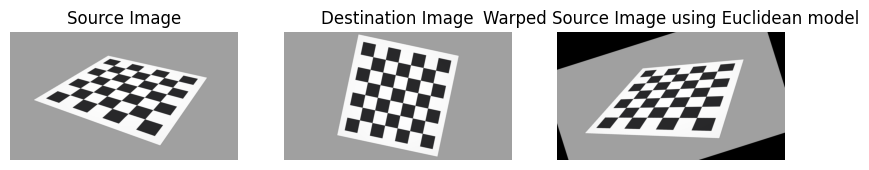

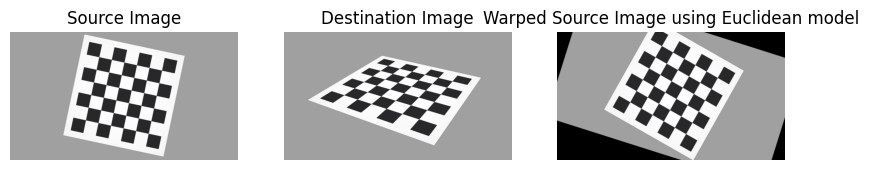

In [ ]:
compute_and_plot_homography(img00c, img01c, keypoints_00, keypoints_01, 'Euclidean')
compute_and_plot_homography(img01c, img00c, keypoints_01, keypoints_00, 'Euclidean')

compute_and_plot_homography(img00c, img02c, keypoints_00, keypoints_02, 'Euclidean')
compute_and_plot_homography(img02c, img00c, keypoints_02, keypoints_00, 'Euclidean')

compute_and_plot_homography(img00c, img03c, keypoints_00, keypoints_03, 'Euclidean')
compute_and_plot_homography(img03c, img00c, keypoints_03, keypoints_00, 'Euclidean')

compute_and_plot_homography(img02c, img01c, keypoints_02, keypoints_01, 'Euclidean')
compute_and_plot_homography(img01c, img02c, keypoints_01, keypoints_02, 'Euclidean')

compute_and_plot_homography(img03c, img01c, keypoints_03, keypoints_01, 'Euclidean')
compute_and_plot_homography(img01c, img03c, keypoints_01, keypoints_03, 'Euclidean')

compute_and_plot_homography(img03c, img02c, keypoints_03, keypoints_02, 'Euclidean')
compute_and_plot_homography(img02c, img03c, keypoints_02, keypoints_03, 'Euclidean')

##Compute Similarity Homography
Compute the Similarity Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

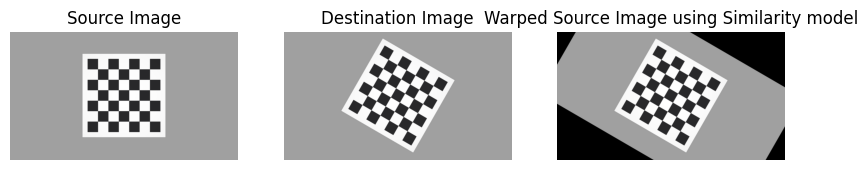

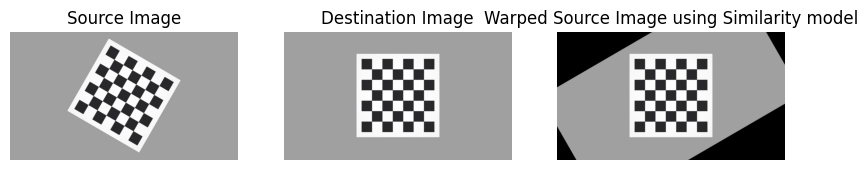

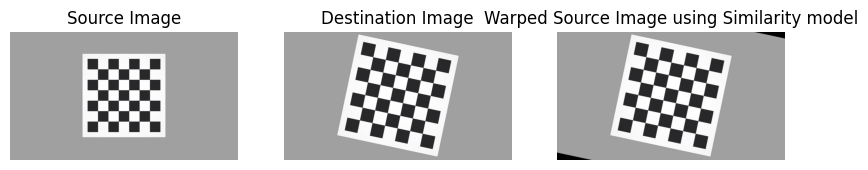

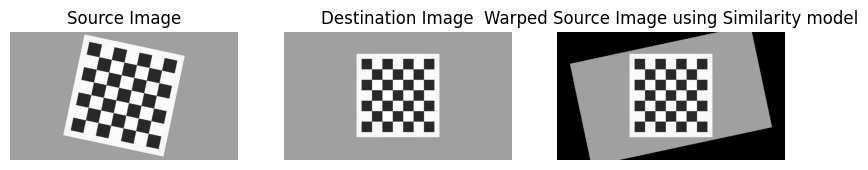

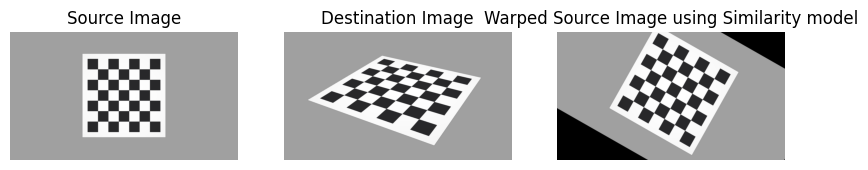

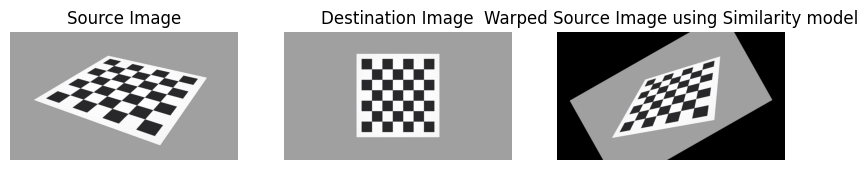

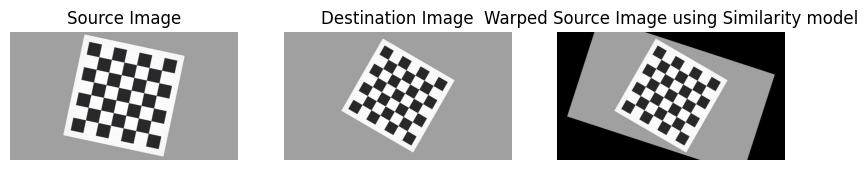

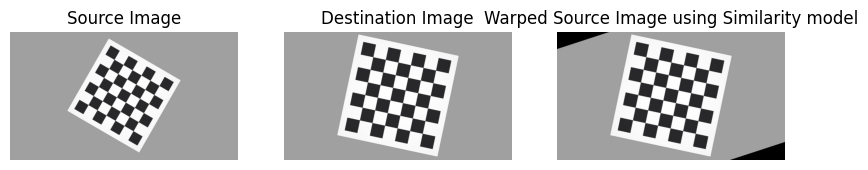

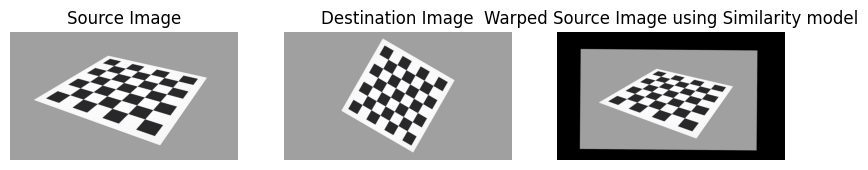

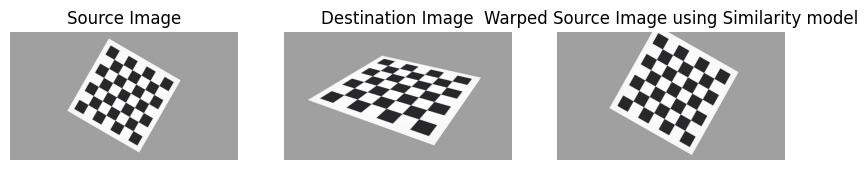

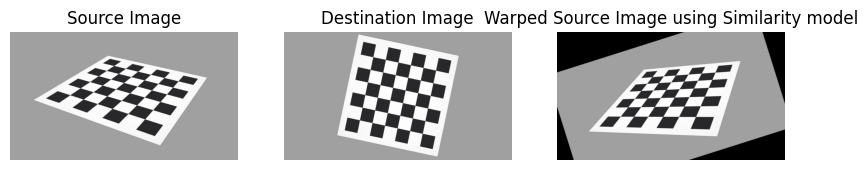

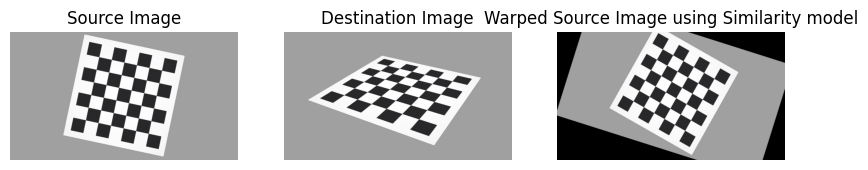

In [ ]:
compute_and_plot_homography(img00c, img01c, keypoints_00, keypoints_01, 'Similarity')
compute_and_plot_homography(img01c, img00c, keypoints_01, keypoints_00, 'Similarity')

compute_and_plot_homography(img00c, img02c, keypoints_00, keypoints_02, 'Similarity')
compute_and_plot_homography(img02c, img00c, keypoints_02, keypoints_00, 'Similarity')

compute_and_plot_homography(img00c, img03c, keypoints_00, keypoints_03, 'Similarity')
compute_and_plot_homography(img03c, img00c, keypoints_03, keypoints_00, 'Similarity')

compute_and_plot_homography(img02c, img01c, keypoints_02, keypoints_01, 'Similarity')
compute_and_plot_homography(img01c, img02c, keypoints_01, keypoints_02, 'Similarity')

compute_and_plot_homography(img03c, img01c, keypoints_03, keypoints_01, 'Similarity')
compute_and_plot_homography(img01c, img03c, keypoints_01, keypoints_03, 'Similarity')

compute_and_plot_homography(img03c, img02c, keypoints_03, keypoints_02, 'Similarity')
compute_and_plot_homography(img02c, img03c, keypoints_02, keypoints_03, 'Similarity')

##Compute Affine Homography

Compute the Affine Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

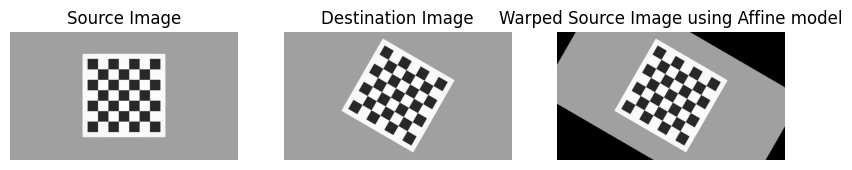

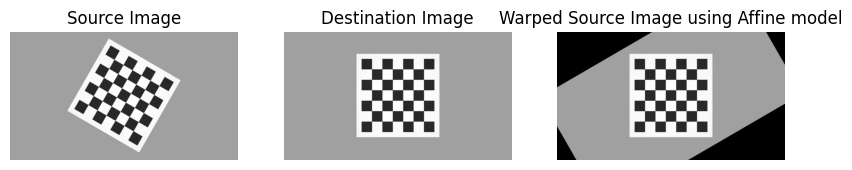

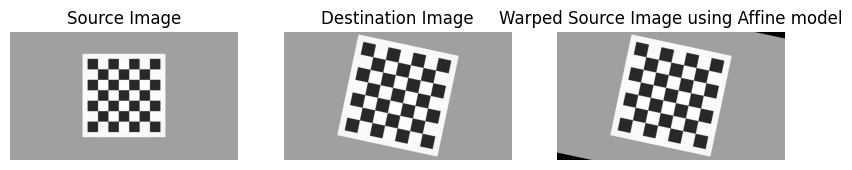

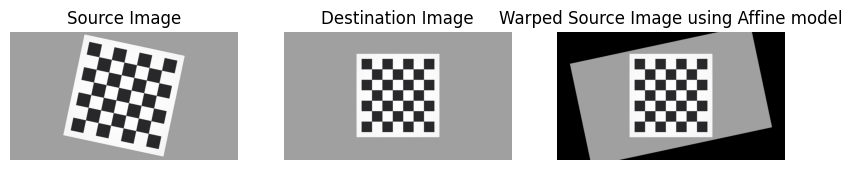

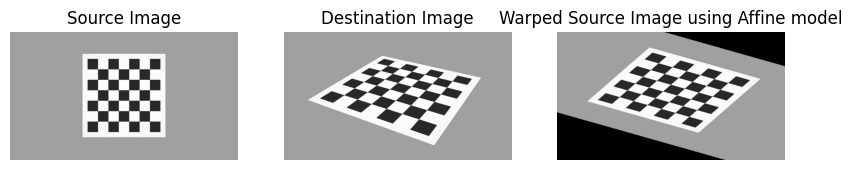

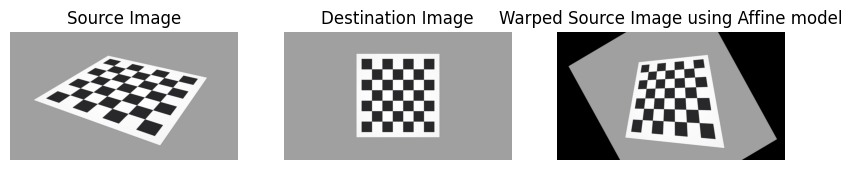

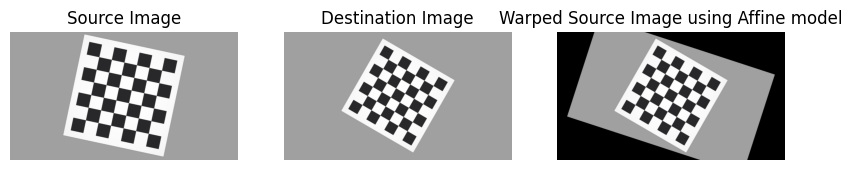

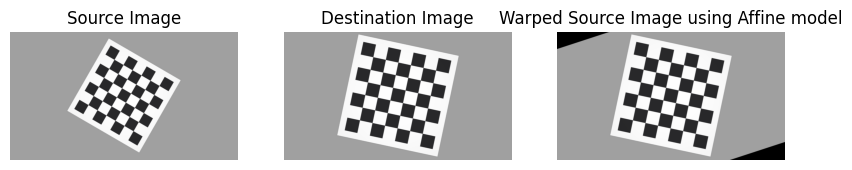

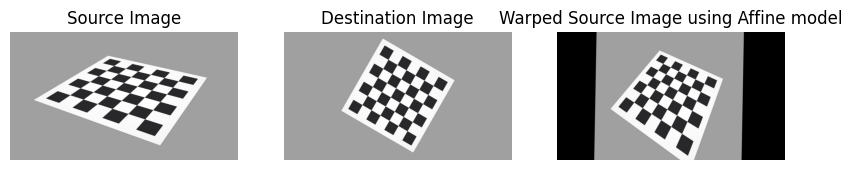

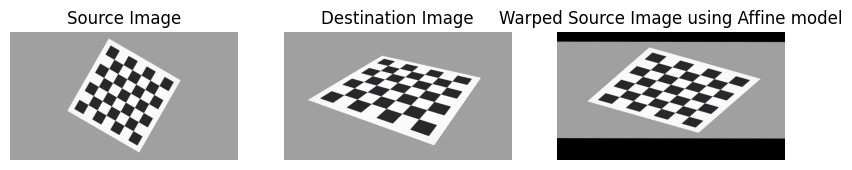

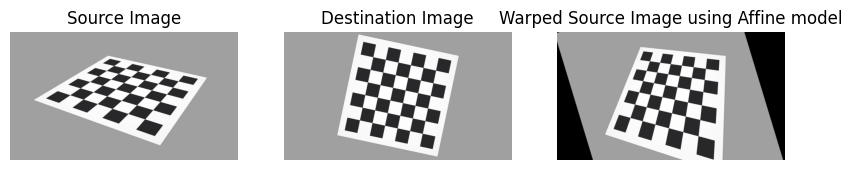

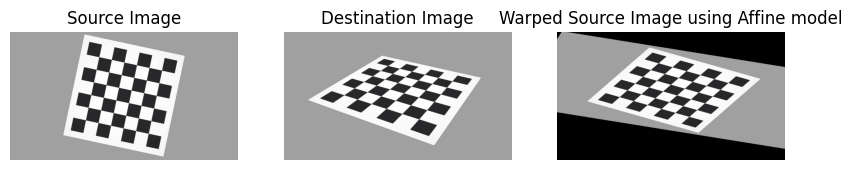

In [ ]:
compute_and_plot_homography(img00c, img01c, keypoints_00, keypoints_01, 'Affine')
compute_and_plot_homography(img01c, img00c, keypoints_01, keypoints_00, 'Affine')

compute_and_plot_homography(img00c, img02c, keypoints_00, keypoints_02, 'Affine')
compute_and_plot_homography(img02c, img00c, keypoints_02, keypoints_00, 'Affine')

compute_and_plot_homography(img00c, img03c, keypoints_00, keypoints_03, 'Affine')
compute_and_plot_homography(img03c, img00c, keypoints_03, keypoints_00, 'Affine')

compute_and_plot_homography(img02c, img01c, keypoints_02, keypoints_01, 'Affine')
compute_and_plot_homography(img01c, img02c, keypoints_01, keypoints_02, 'Affine')

compute_and_plot_homography(img03c, img01c, keypoints_03, keypoints_01, 'Affine')
compute_and_plot_homography(img01c, img03c, keypoints_01, keypoints_03, 'Affine')

compute_and_plot_homography(img03c, img02c, keypoints_03, keypoints_02, 'Affine')
compute_and_plot_homography(img02c, img03c, keypoints_02, keypoints_03, 'Affine')

##Compute Projective Homography

Compute the Euclidean Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

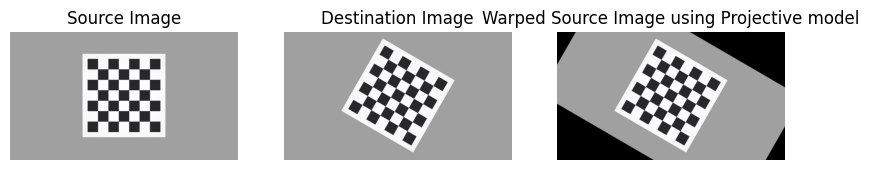

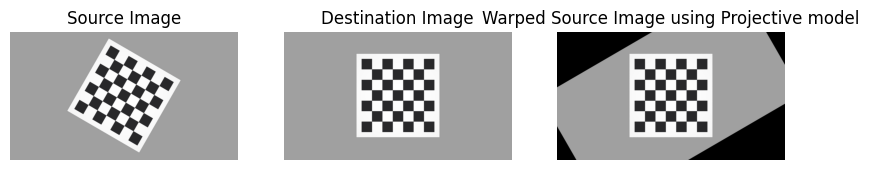

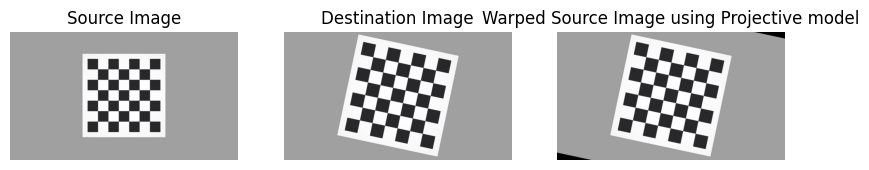

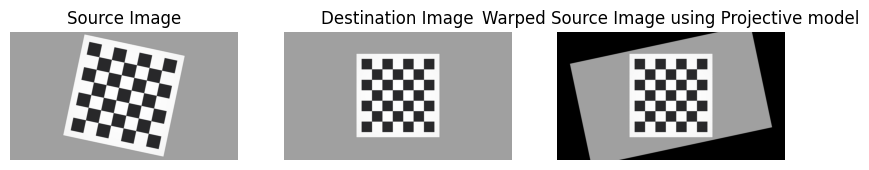

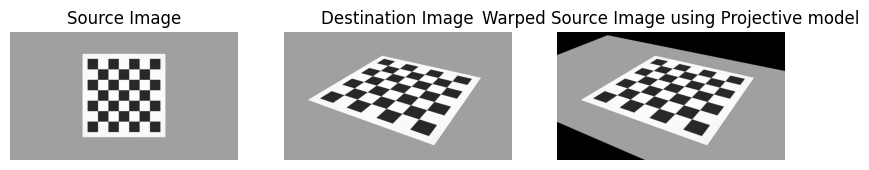

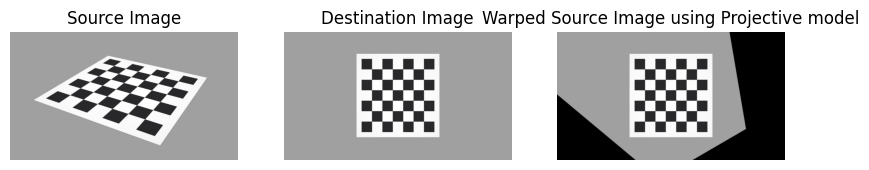

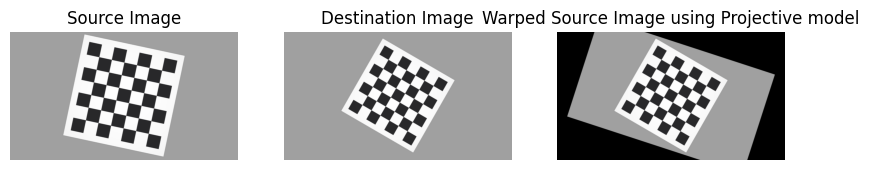

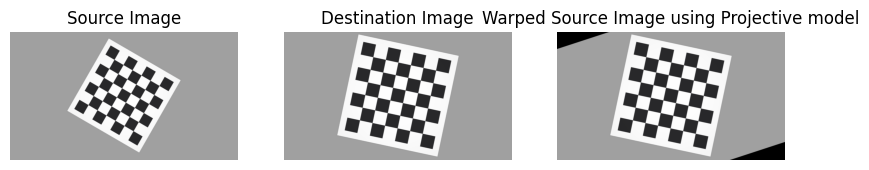

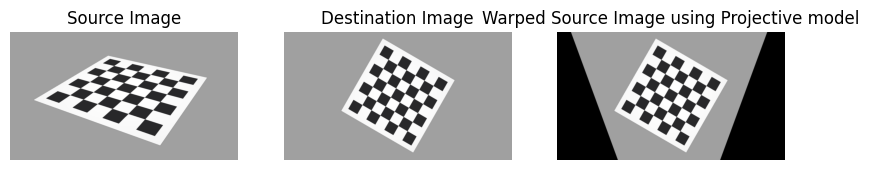

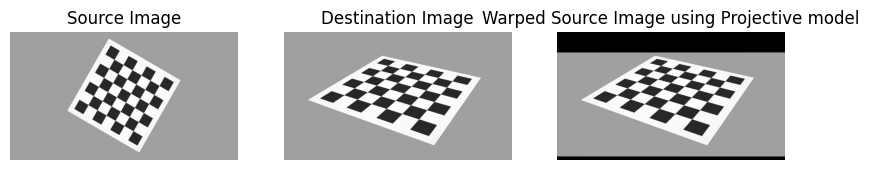

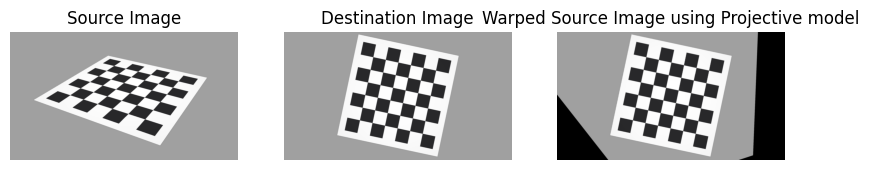

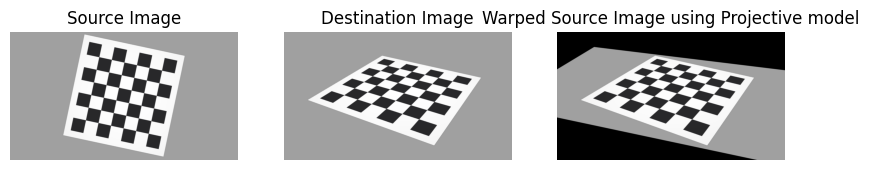

In [ ]:
compute_and_plot_homography(img00c, img01c, keypoints_00, keypoints_01, 'Projective')
compute_and_plot_homography(img01c, img00c, keypoints_01, keypoints_00, 'Projective')

compute_and_plot_homography(img00c, img02c, keypoints_00, keypoints_02, 'Projective')
compute_and_plot_homography(img02c, img00c, keypoints_02, keypoints_00, 'Projective')

compute_and_plot_homography(img00c, img03c, keypoints_00, keypoints_03, 'Projective')
compute_and_plot_homography(img03c, img00c, keypoints_03, keypoints_00, 'Projective')

compute_and_plot_homography(img02c, img01c, keypoints_02, keypoints_01, 'Projective')
compute_and_plot_homography(img01c, img02c, keypoints_01, keypoints_02, 'Projective')

compute_and_plot_homography(img03c, img01c, keypoints_03, keypoints_01, 'Projective')
compute_and_plot_homography(img01c, img03c, keypoints_01, keypoints_03, 'Projective')

compute_and_plot_homography(img03c, img02c, keypoints_03, keypoints_02, 'Projective')
compute_and_plot_homography(img02c, img03c, keypoints_02, keypoints_03, 'Projective')

##Comment the previous obtained results.

Which is the best homography for each image pair? Why?

$\color{red}{\text{For the image pairs 0 and 1, all the homographies gave accurate results! This is because the transformation between them is minimal, simply just a rotation. }}$

$\color{red}{\text{For the image pairs 0 and 2, similarity, affine and projective models returned the best and accurate results. For euclidean model, it failed because of the lack of a scaling factor that it requried to scale the input.}}$

$\color{red}{\text{For the image pairs 0 and 3, only the projective model returned an accurate result. This is simply because there is large perspective distortion in image 3, which the other models cannot handle.}}$

$\color{red}{\text{For the image pairs 1 and 2, similarity, affine and projective models returned accurate results. This is simply because, there is only a scaling transformation between images 1 and 2, of which the Euclidean model cannot handle.}}$

$\color{red}{\text{For the image pairs 1 and 3, only the projective model returned an accurate result. This is also because of the large perspective distortion between images 1 and 3, which the other models cannot handle.}}$

$\color{red}{\text{For the image pairs 2 and 3, only the projective model returned an accurate result. This is because there is large perspective distortion between images 2 and 3, of which the other models cannot handle.}}$

## Compute Homography with skin images

Now Compute the Homography between the 2 skin images used during the first sesion using your Homography Computation function. Use all models and and compare the results

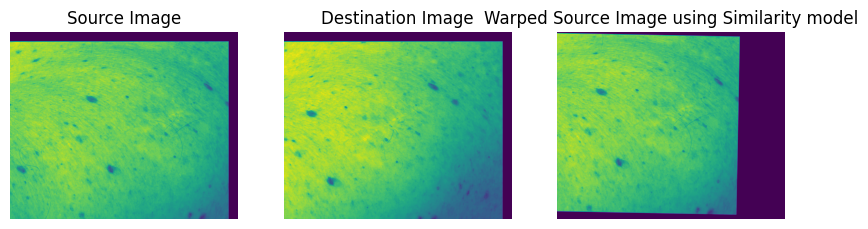

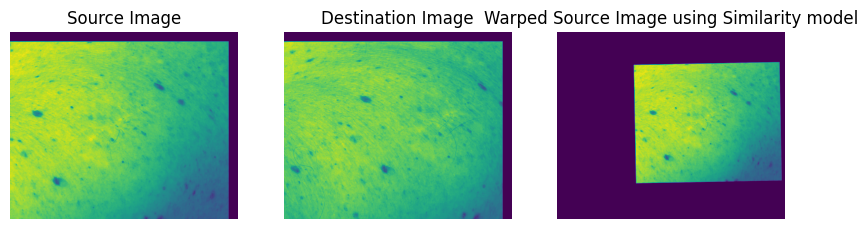

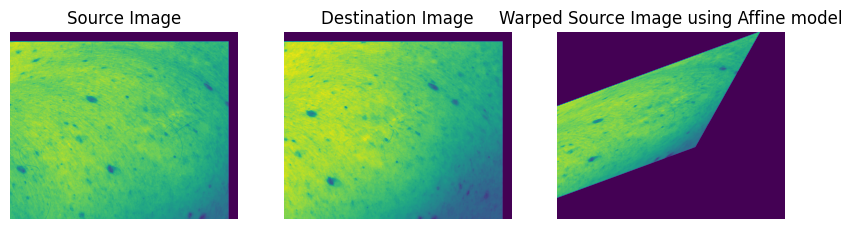

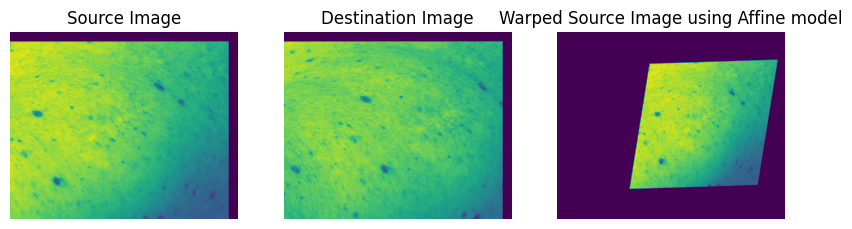

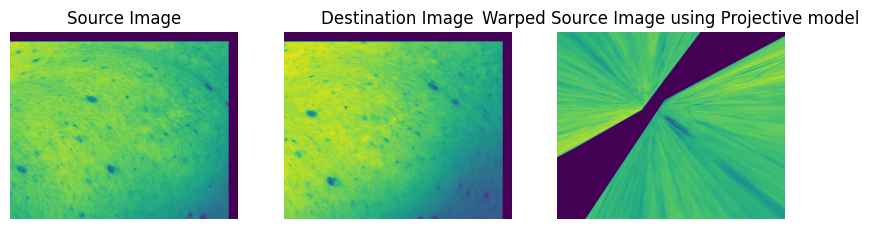

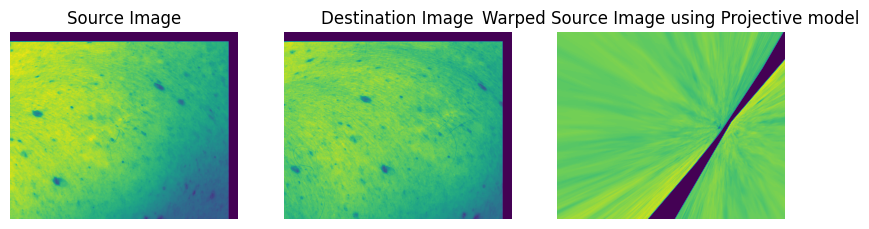

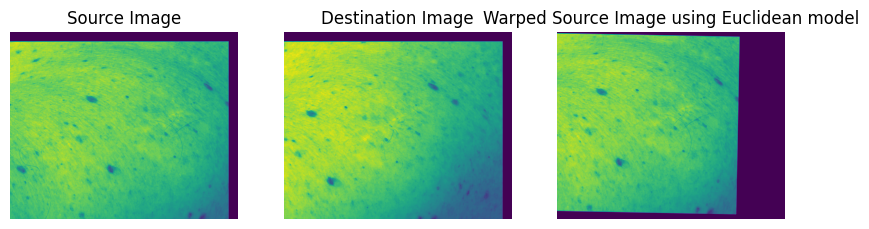

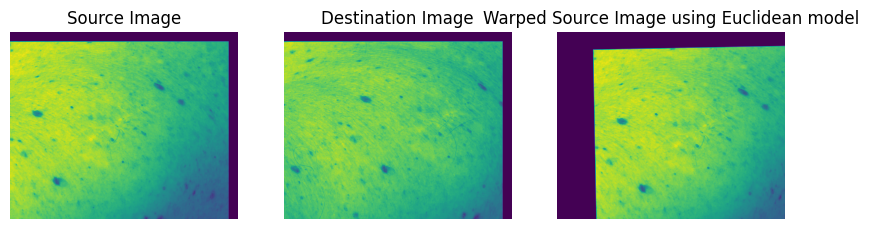

In [ ]:
feat = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
match = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
feat = feat[:,0, :]
match = match[:, 0,:]

compute_and_plot_homography(skin_1, skin_2, feat, match, 'Similarity')
compute_and_plot_homography(skin_2, skin_1, match, feat, 'Similarity')

compute_and_plot_homography(skin_1, skin_2, feat, match, 'Affine')
compute_and_plot_homography(skin_2, skin_1, match, feat, 'Affine')

compute_and_plot_homography(skin_1, skin_2, feat, match, 'Projective')
compute_and_plot_homography(skin_2, skin_1, match, feat, 'Projective')

compute_and_plot_homography(skin_1, skin_2, feat, match, 'Euclidean')
compute_and_plot_homography(skin_2, skin_1, match, feat, 'Euclidean')


## You should notice that you have outliers when you compute the Homography.

Implement RANSAC function and recompute all the Homographies using it.

Finally Warp one of the images and compare your results with the ones obtained using opencv functions.

In [ ]:
def reprojection_error(homography_matrix, source_points, target_points):
    """
    Calculate the reprojection error for a given homography matrix.

    Args:
        homography_matrix: The homography matrix used for transformation.
        source_points: Keypoints from the source image.
        target_points: Corresponding keypoints from the target image.

    Returns:
        total_error: The total reprojection error.
    """
    # Convert to homogeneous coordinates
    source_homogeneous = np.hstack((source_points, np.ones((source_points.shape[0], 1))))
    target_homogeneous = np.hstack((target_points, np.ones((target_points.shape[0], 1))))

    # Forward transformation
    transformed_source = (homography_matrix @ source_homogeneous.T).T
    transformed_source_euclidean = transformed_source[:, :2] / transformed_source[:, 2:]

    # Calculate forward error
    forward_error = np.linalg.norm(transformed_source_euclidean - target_points, axis=1)

    # Inverse transformation
    homography_matrix_inv = np.linalg.inv(homography_matrix + 1e-8 * np.eye(homography_matrix.shape[0]))
    homography_matrix_inv /= homography_matrix_inv[2, 2]

    transformed_target = (homography_matrix_inv @ target_homogeneous.T).T
    transformed_target_euclidean = transformed_target[:, :2] / transformed_target[:, 2:]

    # Calculate backward error
    backward_error = np.linalg.norm(transformed_target_euclidean - source_points, axis=1)

    # Total reprojection error
    total_error = forward_error + backward_error

    return total_error

In [ ]:
def ransac(features, matches, model, distance_threshold, consensus_threshold, num_iterations):
    consensus_indices_list = []
    consensus_count_list = []

    for _ in range(num_iterations):
        sample_points1 = []
        sample_points2 = []

        if model == 'Euclidean':
            sample_indices = random.sample(range(len(features)), 2)
        elif model == 'Similarity':
            sample_indices = random.sample(range(len(features)), 2)
        elif model == 'Affine':
            sample_indices = random.sample(range(len(features)), 3)
        elif model == 'Projective':
            sample_indices = random.sample(range(len(features)), 4)
        else:
            print('Incorrect model name!')
            return

        for i in sample_indices:
            sample_points1.append(features[i])
            sample_points2.append(matches[i])

        homography_matrix = computeHomography(sample_points1, sample_points2, model)  # Compute homography

        distances = reprojection_error(homography_matrix, features, matches)

        inlier_indices = np.where(distances < distance_threshold)[0]  # Indices of inliers
        consensus_indices_list.append(inlier_indices)  # Save the index list for later use

        num_inliers = len(inlier_indices)  # Count of inliers
        consensus_count_list.append(num_inliers)  # Save the count for later use

        if num_inliers > consensus_threshold:  # Check if consensus size exceeds threshold
            consensus_points1 = []
            consensus_points2 = []

            for i in inlier_indices:
                consensus_points1.append(features[i])
                consensus_points2.append(matches[i])

            homography_matrix = computeHomography(consensus_points1, consensus_points2, model)
            return homography_matrix

    # If no consensus size greater than the threshold, compute homography using the maximum consensus
    max_index = consensus_count_list.index(max(consensus_count_list))
    required_consensus_indices = consensus_indices_list[max_index]

    consensus_points1 = []
    consensus_points2 = []

    for i in required_consensus_indices:
        consensus_points1.append(features[i])
        consensus_points2.append(matches[i])

    homography_matrix = computeHomography(consensus_points1, consensus_points2, model)
    return homography_matrix

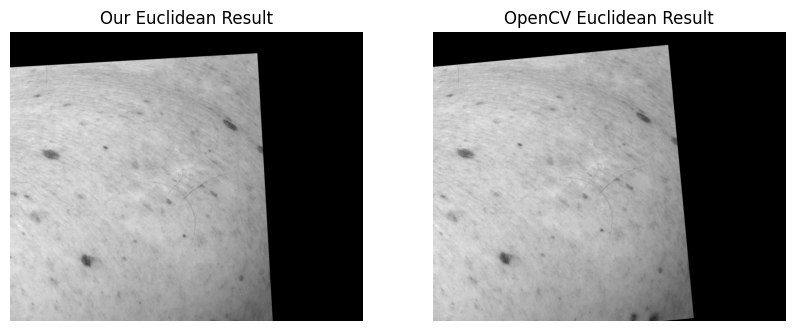

<ipython-input-23-43557aca2d4b>:50: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.sum(S) / np.sum(src_centered ** 2)


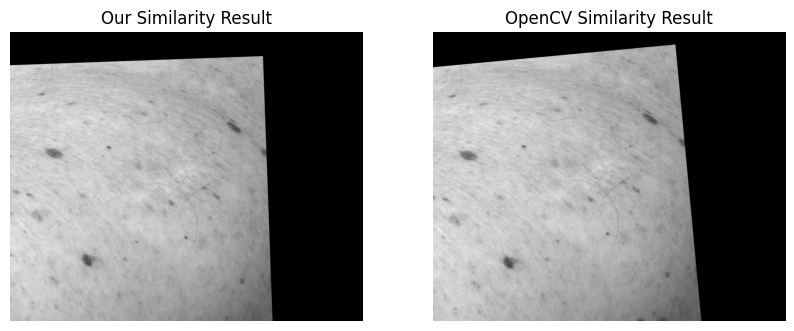

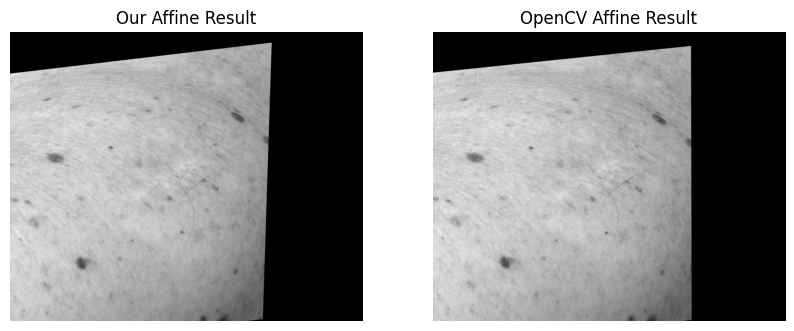

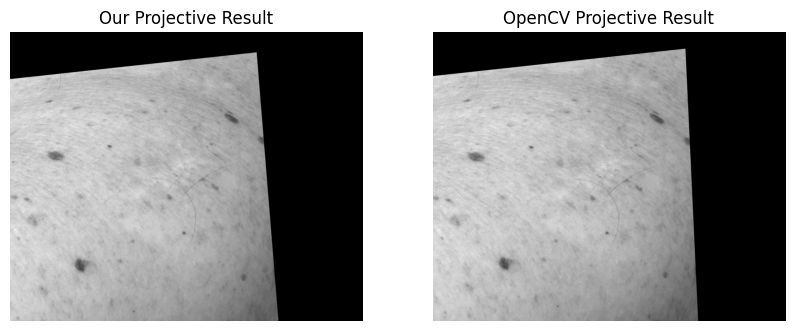

In [ ]:

#----------------------------------------------------------------- Euclidean Homography --------------------------------------------------------

# Parameters for RANSAC implementation
euclidean_dist_threshold = 60
euclidean_count_threshold = int(0.5 * len(feat))
euclidean_num_iterations = 100

# RANSAC implementation for Euclidean Homography
H_euclidean = ransac(feat, match, 'Euclidean', euclidean_dist_threshold, euclidean_count_threshold, euclidean_num_iterations)
final_result_euclidean = cv2.warpPerspective(skin_1, H_euclidean, (skin_1.shape[1], skin_1.shape[0]))

# OpenCV implementation
H_euclidean_cv, _ = cv2.estimateAffinePartial2D(feat, match, method=cv2.RANSAC, ransacReprojThreshold=15.0)
scale_factor = np.sqrt(H_euclidean_cv[1, 0] ** 2 + H_euclidean_cv[1, 1] ** 2) + 1e-6
H_euclidean_cv[:2, :2] /= scale_factor
H_euclidean_cv = np.vstack([H_euclidean_cv, [0, 0, 1]])
final_result_euclidean_cv = cv2.warpPerspective(skin_1, H_euclidean_cv, (skin_1.shape[1], skin_1.shape[0]))

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(final_result_euclidean, cmap='gray')
plt.title('Our Euclidean Result')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_result_euclidean_cv, cmap='gray')
plt.title('OpenCV Euclidean Result')
plt.axis('off')

plt.show()


# ------------------------------------------------------------ Similarity Homography -------------------------------------------------------------

# Parameters for RANSAC implementation
similarity_dist_threshold = 100
similarity_count_threshold = int(0.5 * len(feat))
similarity_num_iterations = 200

# RANSAC implementation for Similarity Homography
H_similarity = ransac(feat, match, 'Similarity', similarity_dist_threshold, similarity_count_threshold, similarity_num_iterations)
final_result_similarity = cv2.warpPerspective(skin_1, H_similarity, (skin_1.shape[1], skin_1.shape[0]))

# OpenCV implementation
H_similarity_cv, _ = cv2.estimateAffinePartial2D(feat, match, method=cv2.RANSAC, ransacReprojThreshold=15.0)
H_similarity_cv = np.vstack([H_similarity_cv, [0, 0, 1]])
final_result_similarity_cv = cv2.warpPerspective(skin_1, H_similarity_cv, (skin_1.shape[1], skin_1.shape[0]))

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(final_result_similarity, cmap='gray')
plt.title('Our Similarity Result')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_result_similarity_cv, cmap='gray')
plt.title('OpenCV Similarity Result')
plt.axis('off')

plt.show()


# ----------------------------------------------------------------- Affine Homography --------------------------------------------------------

# Parameters for RANSAC implementation
affine_dist_threshold = 60
affine_count_threshold = int(0.5 * len(feat))
affine_num_iterations = 100

# RANSAC implementation for Affine Homography
H_affine = ransac(feat, match, 'Affine', affine_dist_threshold, affine_count_threshold, affine_num_iterations)
final_result_affine = cv2.warpPerspective(skin_1, H_affine, (skin_1.shape[1], skin_1.shape[0]))

# OpenCV implementation
H_affine_cv, _ = cv2.estimateAffine2D(feat, match, method=cv2.RANSAC, ransacReprojThreshold=15.0)
H_affine_cv = np.vstack([H_affine_cv, [0, 0, 1]])
final_result_affine_cv = cv2.warpPerspective(skin_1, H_affine_cv, (skin_1.shape[1], skin_1.shape[0]))

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(final_result_affine, cmap='gray')
plt.title('Our Affine Result')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_result_affine_cv, cmap='gray')
plt.title('OpenCV Affine Result')
plt.axis('off')

plt.show()


#---------------------------------------------------------------------- Projective Homography ---------------------------------------------------

# Parameters for RANSAC implementation
projective_dist_threshold = 60
projective_count_threshold = int(0.5 * len(feat))
projective_num_iterations = 200

# RANSAC implementation for Projective Homography
H_projective = ransac(feat, match, 'Projective', projective_dist_threshold, projective_count_threshold, projective_num_iterations)
final_result_projective = cv2.warpPerspective(skin_1, H_projective, (skin_1.shape[1], skin_1.shape[0]))

# OpenCV implementation
H_projective_cv, _ = cv2.findHomography(feat, match, method=cv2.RANSAC, ransacReprojThreshold=15.0)
final_result_projective_cv = cv2.warpPerspective(skin_1, H_projective_cv, (skin_1.shape[1], skin_1.shape[0]))

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(final_result_projective, cmap='gray')
plt.title('Our Projective Result')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_result_projective_cv, cmap='gray')
plt.title('OpenCV Projective Result')
plt.axis('off')

plt.show()

## Extra Work

There are many ways to apply *Deep Learning* for registering images. Do some research and find a solution that uses it and apply it to skin1 and skin2 images.

We found Voxel Morph and an illustration of how it can be used is shown below:

In [5]:
# @title
# Registration model.
in_shape = (256,) * 2
import keras
model_def = vxm.networks.VxmDense(
    inshape=in_shape,
    int_resolution=2,
    svf_resolution=2,
    nb_unet_features=([256] * 4, [256] * 8),
    reg_field='warp',
)

ima_1, map_1 = keras.layers.Input(shape=(256, 256, 1)), keras.layers.Input(shape=(256, 256, 16))
ima_2, map_2 = keras.layers.Input(shape=(256, 256, 1)), keras.layers.Input(shape=(256, 256, 16))
_, warp = model_def((ima_1, ima_2))
moved = vxm.layers.SpatialTransformer(fill_value=0)((map_1, warp))


# Contrast invariance: MSE loss on probability maps.
class AddLoss(tf.keras.layers.Layer):
    def call(self, x):
        moved, map_2, warp = x
        const = tf.zeros((tf.shape(moved)[0], 1))
        self.add_loss(vxm.losses.MSE().loss(moved, map_2) + const)
        self.add_loss(vxm.losses.Grad('l2', loss_mult=0.05).loss(None, warp))
        return x


# Combined model: synthesis and registration.
inputs = (ima_1, ima_2)
model = tf.keras.Model(inputs, AddLoss()((moved, map_2, warp)))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))

# Skip training, download model weights.
!gdown -O weights.h5 "19ayDE-otx2kTcGzEhz_pv9MjnJkpX638"
model.load_weights('weights.h5')

Downloading...
From: https://drive.google.com/uc?id=19ayDE-otx2kTcGzEhz_pv9MjnJkpX638
To: /content/weights.h5
100% 33.2M/33.2M [00:00<00:00, 171MB/s]


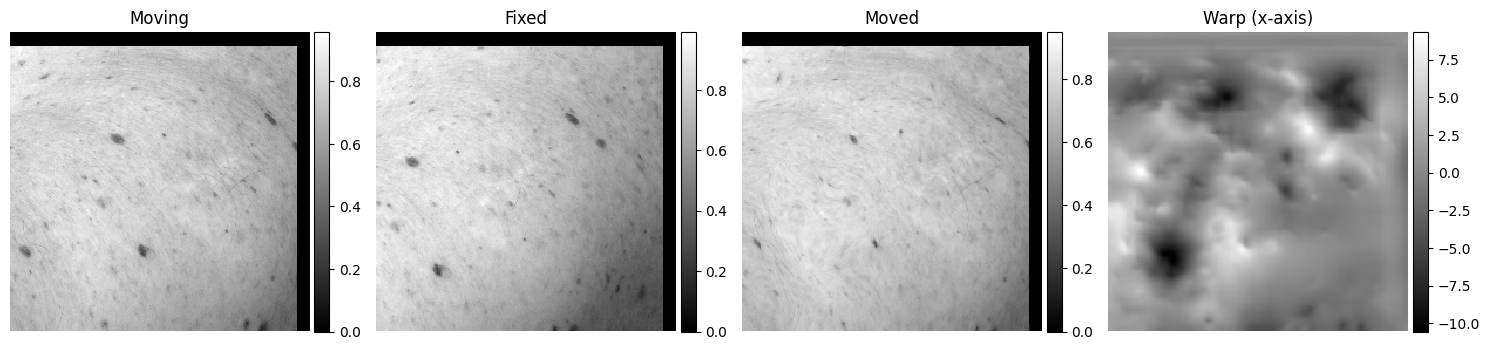

In [8]:
# Registration model.
def conform(x, in_shape=in_shape):
    x = np.float32(x)
    x = np.squeeze(x)
    x = ne.utils.minmax_norm(x)
    x = ne.utils.zoom(x, zoom_factor=[o / i for o, i in zip(in_shape, x.shape)])
    return x[None, ..., None]


def register(moving, fixed):
    # Conform and register.
    moving = conform(moving)
    fixed = conform(fixed)
    moved, warp = model_def.predict((moving, fixed), verbose=0)

    # Visualize.
    slices = (moving, fixed, moved, warp[..., 0])
    titles = ('Moving', 'Fixed', 'Moved', 'Warp (x-axis)')
    ne.plot.slices(slices, titles, do_colorbars=True)

register(moving=skin_1, fixed=skin_2)

This is simply a trial, as an accurate result will require a trained model.


## Congratulations!
In this lab you:
- tested SIFT Algorithm
- implemented homography computation

Submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.